Importamos los modulos necesarios, pandas para trabajar  y numpy para trabajar nuestros datos, train test para elegir datos de entrenamiento y prueba, logisticRegression para realizar el modelo ya que es binario elejimos este modelo, y las metricas para revisar nuestra prediccion 

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt


Cagamos nuestros datos con pandas dataframe

In [17]:
df=pd.read_csv('E-Commerce_train.csv',sep=';',index_col=False)

Obervamos el resltado del Dataframe

In [18]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,8995,D,Ship,3,1,217,3,low,F,1,4177,1
8995,8996,F,Ship,5,3,232,3,medium,M,3,4526,0
8996,8997,A,Ship,4,5,260,3,medium,F,6,4221,0
8997,8998,B,Ship,4,2,184,3,medium,F,5,5931,1


Se hizo un analisis y se observo que la columna ID afectaba negativamente el modelo, asi que procedo a eliminar.

In [19]:
df = df.drop(columns = ['ID'])

In [20]:
Aplico OneHotEncoder a las columnas categoricas, en principio a Gender

SyntaxError: invalid syntax (3434632068.py, line 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instanciamos el encoder por binary feature

ohe.fit(df[['Gender']]) # 

df['Gender'] = ohe.transform(df[['Gender']]) # Encodeamos Street

df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,0.0,44,1233,1
1,F,Flight,4,5,216,2,low,1.0,59,3088,1
2,A,Flight,2,2,183,4,low,1.0,48,3374,1
3,B,Flight,3,3,176,4,medium,1.0,10,1177,1
4,C,Flight,2,2,184,3,medium,0.0,46,2484,1


Buscamos valores atipicos y el cpmportamineto de las variables

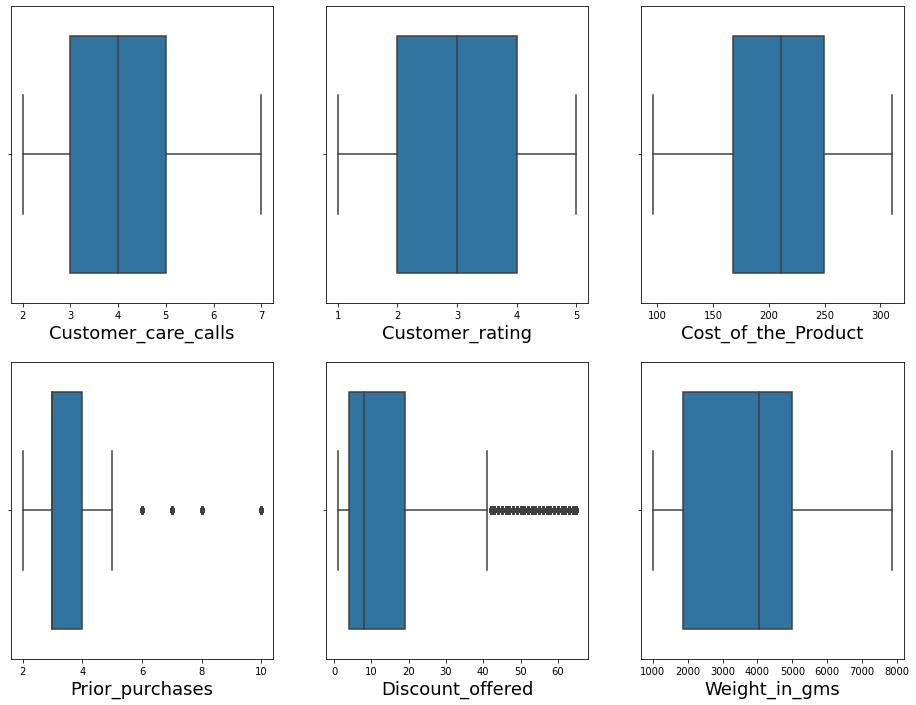

In [ ]:
dfnum = df.drop(columns = ['Warehouse_block', 'Mode_of_Shipment',
                                  'Product_importance', 'Gender',
                                  'Reached.on.Time_Y.N'])
fig,ax= plt.subplots(ncols=3,nrows=2,figsize=(16, 12)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()):
    boxdetails = sns.boxplot(x = dfnum[variable], ax=subplot) 
    boxdetails.set_xlabel(variable, fontsize = 18)
    
plt.show()

c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

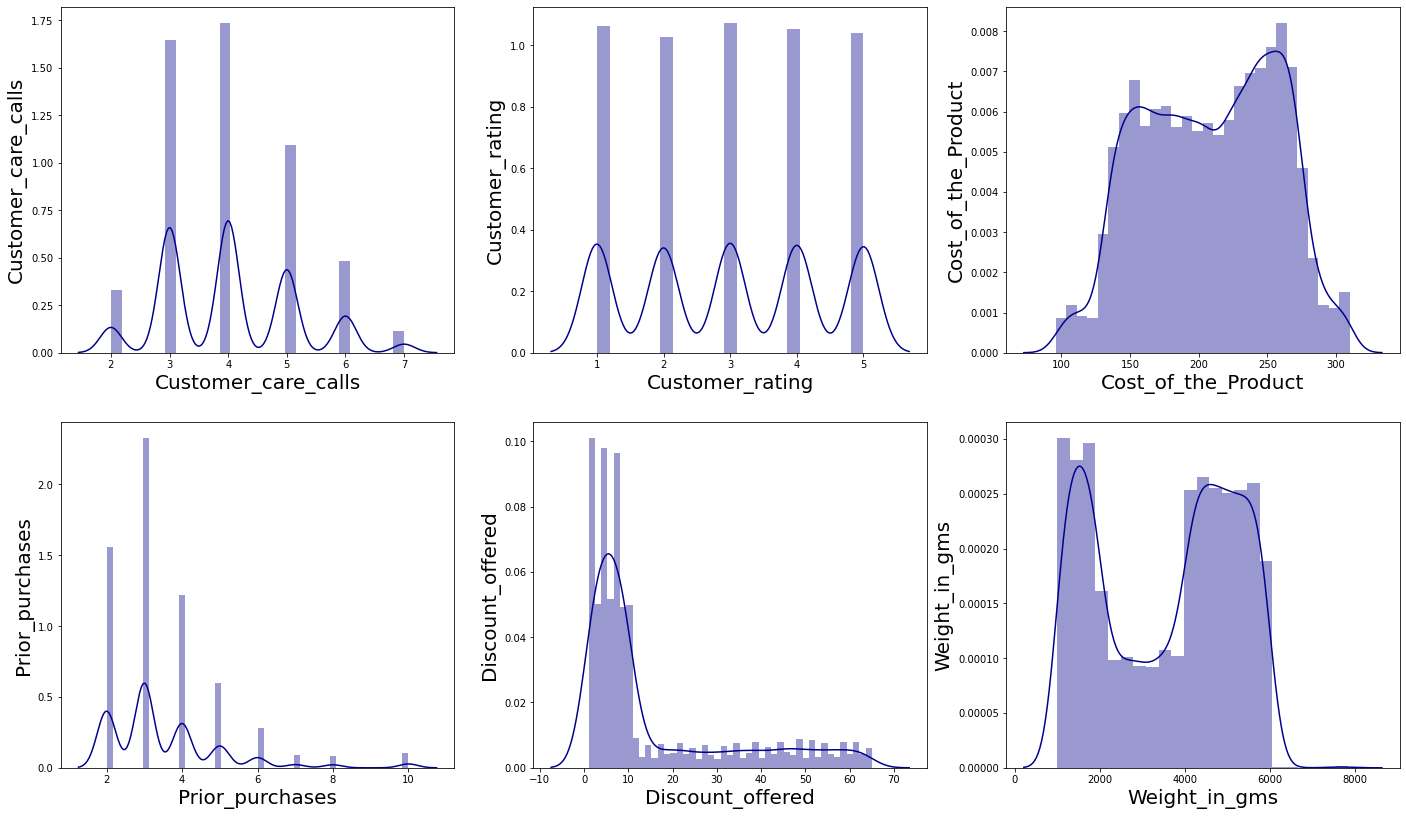

In [ ]:
fig,ax= plt.subplots(ncols=3,nrows=2,figsize=(24,14)) 
for variable, subplot in zip(dfnum.columns,ax.flatten()):
    distdetails = sns.distplot(x = dfnum[variable], color = 'darkblue', ax=subplot,) 
    distdetails.set_xlabel(variable, fontsize = 20)
    distdetails.set_ylabel(variable, fontsize = 20)
    
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      8999 non-null   object 
 1   Mode_of_Shipment     8999 non-null   object 
 2   Customer_care_calls  8999 non-null   int64  
 3   Customer_rating      8999 non-null   int64  
 4   Cost_of_the_Product  8999 non-null   int64  
 5   Prior_purchases      8999 non-null   int64  
 6   Product_importance   8999 non-null   object 
 7   Gender               8999 non-null   float64
 8   Discount_offered     8999 non-null   int64  
 9   Weight_in_gms        8999 non-null   int64  
 10  Reached.on.Time_Y.N  8999 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 773.5+ KB


aplico OneHotEncoder a las columnas Warehouse_block Mode_of_Shipment Product_importance

In [ ]:
# One-hot encoding a single column
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['Warehouse_block']])
print(transformed.toarray())
df[ohe.categories_[0]] = transformed.toarray()


ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['Mode_of_Shipment']])
print(transformed.toarray())
df[ohe.categories_[0]] = transformed.toarray()


ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['Product_importance']])
print(transformed.toarray())
df[ohe.categories_[0]] = transformed.toarray()


[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


Revisamos valores flatantes del dataframe

In [ ]:
df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,...,B,C,D,F,Flight,Road,Ship,high,low,medium
0,D,Flight,4,2,177,3,low,0.0,44,1233,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,F,Flight,4,5,216,2,low,1.0,59,3088,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,A,Flight,2,2,183,4,low,1.0,48,3374,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,B,Flight,3,3,176,4,medium,1.0,10,1177,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,C,Flight,2,2,184,3,medium,0.0,46,2484,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8994,D,Ship,3,1,217,3,low,0.0,1,4177,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8995,F,Ship,5,3,232,3,medium,1.0,3,4526,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8996,A,Ship,4,5,260,3,medium,0.0,6,4221,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8997,B,Ship,4,2,184,3,medium,0.0,5,5931,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
A                      0
B                      0
C                      0
D                      0
F                      0
Flight                 0
Road                   0
Ship                   0
high                   0
low                    0
medium                 0
dtype: int64

In [ ]:
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,A,B,C,D,F,Flight,Road,Ship,high,low,medium
count,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000,8999.000000
mean,4.015113,2.994999,208.561507,3.511501,0.495499,15.097678,3584.364596,0.635515,0.166685,0.166685,0.166685,0.166685,0.333259,0.160796,0.158907,0.680298,0.092566,0.478720,0.428714
std,1.138934,1.413143,48.289172,1.532074,0.500008,17.400040,1614.750194,0.481312,0.372715,0.372715,0.372715,0.372715,0.471405,0.367363,0.365609,0.466387,0.289839,0.499575,0.494920
min,2.000000,1.000000,96.000000,2.000000,0.000000,1.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,168.000000,3.000000,0.000000,4.000000,1857.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,211.000000,3.000000,0.000000,8.000000,4046.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,249.500000,4.000000,1.000000,19.000000,4999.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,1.000000,65.000000,7846.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Revisamos la distribucion de la variable ojetivo

In [ ]:
df['Reached.on.Time_Y.N'].value_counts()

1    5719
0    3280
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
df.tail()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,...,B,C,D,F,Flight,Road,Ship,high,low,medium
8994,D,Ship,3,1,217,3,low,0.0,1,4177,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8995,F,Ship,5,3,232,3,medium,1.0,3,4526,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
8996,A,Ship,4,5,260,3,medium,0.0,6,4221,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8997,B,Ship,4,2,184,3,medium,0.0,5,5931,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8998,C,Ship,5,4,145,4,low,1.0,4,4790,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      8999 non-null   object 
 1   Mode_of_Shipment     8999 non-null   object 
 2   Customer_care_calls  8999 non-null   int64  
 3   Customer_rating      8999 non-null   int64  
 4   Cost_of_the_Product  8999 non-null   int64  
 5   Prior_purchases      8999 non-null   int64  
 6   Product_importance   8999 non-null   object 
 7   Gender               8999 non-null   float64
 8   Discount_offered     8999 non-null   int64  
 9   Weight_in_gms        8999 non-null   int64  
 10  Reached.on.Time_Y.N  8999 non-null   int64  
 11  A                    8999 non-null   float64
 12  B                    8999 non-null   float64
 13  C                    8999 non-null   float64
 14  D                    8999 non-null   float64
 15  F                    8999 non-null   f

In [ ]:
Creamos las variables a utulizar

In [ ]:

X=df.drop(columns=['Reached.on.Time_Y.N','Mode_of_Shipment','Product_importance','Warehouse_block'], axis=1)
Y=df['Reached.on.Time_Y.N']

In [ ]:
X.shape

(8999, 18)

Seleccionamos nuestros datos de entrenamiento y de test y los dividimos de manera aleatoria

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y,random_state=0)



In [ ]:
X.shape, X_train.shape, X_test.shape, 

((8999, 18), (7199, 18), (1800, 18))

Se probaron 3 modelos con diferentes configuraciones, cada uno de los modelos probados se enceuntra comentado, los modelos utlizados fueron 
LogisticRegression
RandomForestClassifier
KNeighborsClassifier

In [ ]:
#modelo2=LogisticRegression()
#modelo2=LogisticRegression(fit_intercept=True, penalty='l2', tol=1e-5, C=0.8, solver='lbfgs', max_iter=1000,
                    #  warm_start=True)
#modelo2 =  RandomForestClassifier(random_state = 42)
#modelo2  = RandomForestClassifier(max_depth=8, random_state=0 , criterion= 'entropy' , max_features='log2' , min_samples_split= 9 , n_estimators= 500)

In [ ]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 4,
                         n_jobs = -1)
    gscv.fit(X_train , Y_train)
    result = gscv.best_params_
    return result

Se hizo una busqueda de los parametros con mejor comportamiento para el modelo RandomForestClassifier

In [ ]:
gs_rf = RandomForestClassifier(random_state = 0)
rf_params = {
 'n_estimators':[200,500],
 'criterion': ('gini','entropy'),
 'max_depth': [2, 3 ,4, 5, 6, 7, 8],
 'min_samples_split': [2, 9],
 'max_features': ("auto", "sqrt", "log2") }
print('Best parameters for Random Forest: ', gridsearch(gs_rf , rf_params))

c:\Users\Jorge\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 9, 'n_estimators': 200}


Se hizo una busqueda de los parametros con mejor comportamiento para el modelo KNeighborsClassifier

In [ ]:
gs_knn = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
print('Best parameters for KNN: ', gridsearch(gs_knn , knn_params))

Best parameters for KNN:  {'n_neighbors': 9}


In [ ]:
#modelo2  = RandomForestClassifier(max_depth=7, random_state=42 , criterion= 'entropy' , max_features='auto' , min_samples_split= 2 , n_estimators= 500)
#modelo2=LogisticRegression(random_state=0, penalty = 'l2')

In [ ]:

modelo2 = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)

In [ ]:
modelo2.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

Se realiza un calculo del recalll y del accuracy_score

In [ ]:
X_train_prediction=modelo2.predict(X_train)
Precision_Datos_entrenamiento=accuracy_score(X_train_prediction,Y_train)
from sklearn.metrics import recall_score
Calculo_Recallo=recall_score(X_train_prediction,Y_train)

In [ ]:
Precision_Datos_entrenamiento,Calculo_Recallo

(0.7677455202111404, 0.843875858801232)

In [ ]:
X_test_prediction=modelo2.predict(X_test)
Precision_Datos_test=accuracy_score(X_test_prediction,Y_test)
Calculo_Recallo=recall_score(X_test_prediction,Y_test)

In [ ]:
Precision_Datos_entrenamiento,Calculo_Recallo

(0.7677455202111404, 0.7527472527472527)

Se cargo el documeto de test y se realizo el mismo tratamiento mostrado anteriormente

In [ ]:
dftest=pd.read_csv('E-Commerce_test.csv',sep=';')

In [ ]:
dftest = dftest.drop(columns = ['ID'])

In [ ]:
dftest

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,F,Ship,5,1,189,2,medium,M,10,5248
1,D,Ship,5,3,150,2,high,F,9,4446
2,F,Ship,3,3,200,3,low,M,3,5739
3,A,Ship,5,1,133,2,medium,M,1,4643
4,B,Ship,4,2,260,3,low,M,4,5504
...,...,...,...,...,...,...,...,...,...,...
1995,A,Ship,4,1,252,5,medium,F,1,1538
1996,B,Ship,4,1,232,5,medium,F,6,1247
1997,C,Ship,5,4,242,5,low,F,4,1155
1998,F,Ship,5,2,223,6,medium,M,2,1210


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary', sparse = False) # Instanciamos el encoder por binary feature

ohe.fit(dftest[['Gender']]) # 

dftest['Gender'] = ohe.transform(dftest[['Gender']]) # Encodeamos Street

dftest.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,F,Ship,5,1,189,2,medium,1.0,10,5248
1,D,Ship,5,3,150,2,high,0.0,9,4446
2,F,Ship,3,3,200,3,low,1.0,3,5739
3,A,Ship,5,1,133,2,medium,1.0,1,4643
4,B,Ship,4,2,260,3,low,1.0,4,5504


In [ ]:
# One-hot encoding a single column
from sklearn.preprocessing import OneHotEncoder
from seaborn import load_dataset

ohe = OneHotEncoder()
transformed = ohe.fit_transform(dftest[['Warehouse_block']])
print(transformed.toarray())
dftest[ohe.categories_[0]] = transformed.toarray()


ohe = OneHotEncoder()
transformed = ohe.fit_transform(dftest[['Mode_of_Shipment']])
print(transformed.toarray())
dftest[ohe.categories_[0]] = transformed.toarray()


ohe = OneHotEncoder()
transformed = ohe.fit_transform(dftest[['Product_importance']])
print(transformed.toarray())
dftest[ohe.categories_[0]] = transformed.toarray()


[[0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
X1=dftest.drop(columns=['Mode_of_Shipment','Product_importance','Warehouse_block'], axis=1)


In [ ]:
X1.shape

(2000, 18)

In [ ]:
X1prediction=modelo2.predict(X1)

In [ ]:
X1prediction

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
type(X1prediction)

numpy.ndarray

In [ ]:
datasalida = pd.DataFrame(X1prediction)

In [ ]:
datasalida[0].value_counts()

0    1222
1     778
Name: 0, dtype: int64

In [ ]:
datasalida.columns=['pred']

In [ ]:
datasalida.to_csv('jorgemfa113.csv', index=False)